<a href="https://colab.research.google.com/github/gnellany/AI-Classification/blob/master/GTSRB_Traffic_Signs_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

In [0]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gerrynellany","key":"03537d29a019acd0fd250eb50c5ad810"}'}

In [5]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
from zipfile import ZipFile
file_name = "gtsrb-german-traffic-sign.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

-rw-r--r-- 1 root root 68 Jan  3 13:48 kaggle.json
 99% 603M/612M [00:06<00:00, 162MB/s]
100% 612M/612M [00:06<00:00, 103MB/s]
Done


In [2]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "/content/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/train/0/
/content/train/1/
/content/train/2/
/content/train/3/
/content/train/4/
/content/train/5/
/content/train/6/
/content/train/7/
/content/train/8/
/content/train/9/
/content/train/10/
/content/train/11/
/content/train/12/
/content/train/13/
/content/train/14/
/content/train/15/
/content/train/16/
/content/train/17/
/content/train/18/
/content/train/19/
/content/train/20/
/content/train/21/
/content/train/22/
/content/train/23/
/content/train/24/
/content/train/25/
/content/train/26/
/content/train/27/
/content/train/28/
/content/train/29/
/content/train/30/
/content/train/31/
/content/train/32/
/content/train/33/
/content/train/34/
/content/train/35/
/content/train/36/
/content/train/37/
/content/train/38/
/content/train/39/
/content/train/40/
/content/train/41/
/content/train/42/


In [0]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [5]:
#Definition of the DNN model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 31368 samples, validate on 7841 samples
Epoch 1/10





31368/31368 [==============================] - 141s 5ms/step - loss: 1.4383 - acc: 0.5961 - val_loss: 0.2609 - val_acc: 0.9194
Epoch 2/10
31368/31368 [==============================] - 141s 5ms/step - loss: 0.3414 - acc: 0.8921 - val_loss: 0.1135 - val_acc: 0.9658
Epoch 3/10
31368/31368 [==============================] - 142s 5ms/step - loss: 0.2325 - acc: 0.9292 - val_loss: 0.0651 - val_acc: 0.9828
Epoch 4/10
31368/31368 [==============================] - 143s 5ms/step - loss: 0.1771 - acc: 0.9465 - val_loss: 0.0594 - val_acc: 0.9832
Epoch 5/10
31368/31368 [==============================] - 143s 5ms/step - loss: 0.1515 - acc: 0.9532 - val_loss: 0.0549 - val_acc: 0.9823
Epoch 6/10
31368/31368 [==============================] - 144s 5ms/step - loss: 0.1323 - acc: 0.9592 - val_loss: 0.0474 - val_acc: 0.9850
Epoch 7/10
31368/3136

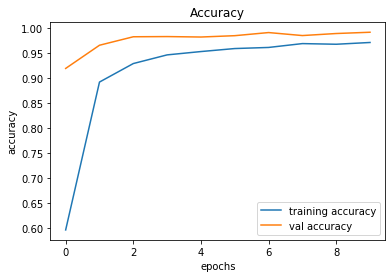

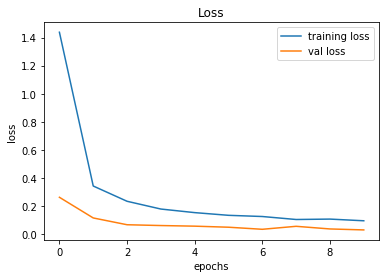

In [6]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values


plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [7]:
#Predicting with the test data
y_test=pd.read_csv("/content/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
#Accuracy with the test data

accuracy_score(y_test, pred)

0.9593032462391132

[[ 58   1   0 ...   0   0   0]
 [  0 718   3 ...   0   0   0]
 [  0   0 743 ...   0   0   0]
 ...
 [  0   0   0 ...  83   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  88]]  is the Neural Network score


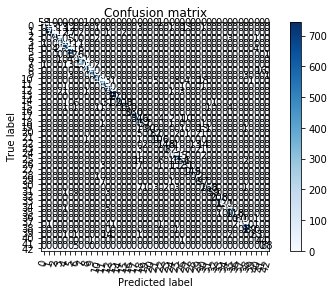

In [10]:
# Confussion matrix 


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')
print(cm, ' is the Neural Network score')